# Hypothesis Testing with Insurance Data (Core)
Jon Messier \
3/9/2023

For this assignment, we will be working with the [US Health Insurance Dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv) from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?


For each question, make sure to:

1.  State your Null Hypothesis and Alternative Hypothesis
2.   Select the correct test according to the data type and number of samples
3.   Test the assumptions of your selected test.
4.  Execute the selected test, or the alternative test (if you do not meet the assumptions)
5.   Interpret your p-value and reject or fail to reject your null hypothesis 
6.   Show a supporting visualization that helps display the result




In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy

In [2]:
## load the health data set. display info and head
df = pd.read_csv("Data/insurance - insurance.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


> No null data

## Q1 Do smokers have higher insurance charges than non-smokers?

### 1.  State your Null Hypothesis and Alternative Hypothesis
- $H_0$ (Null Hypothesis): There is no difference in insurance charges between smokers and non smokers. 
- $H_A$ (Alternative Hypothesis):  There is a significant difference in insurance charges between smokers and non smokers. 


### 2. Select the correct test according to the data type and number of samples

- Type of Data? 
 - Numeric - `Charges` 
- How many groups/samples? 2
    - 2 smoker/non-smoker
- Therefore, which test is appropriate? 
    - 2 Sample T-test



### Visualize and Separate Data for hypothesis

In [3]:
df["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [4]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
#Separate y - smoker and n - non-smoker data
y_df = df[df["smoker"]=="yes"]
n_df = df[df["smoker"]=="no"]

<AxesSubplot: xlabel='smoker', ylabel='charges'>

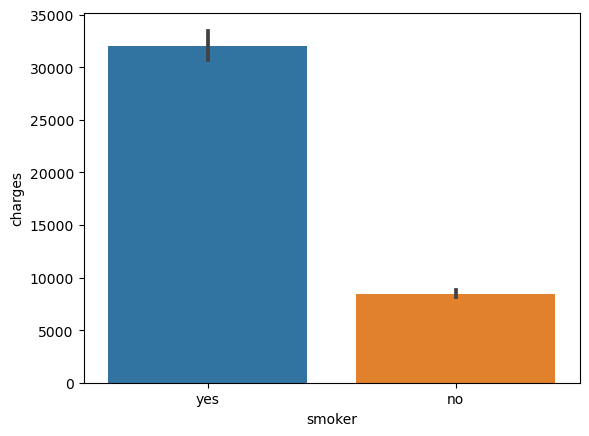

In [6]:
sns.barplot(data=df, x="smoker", y="charges")

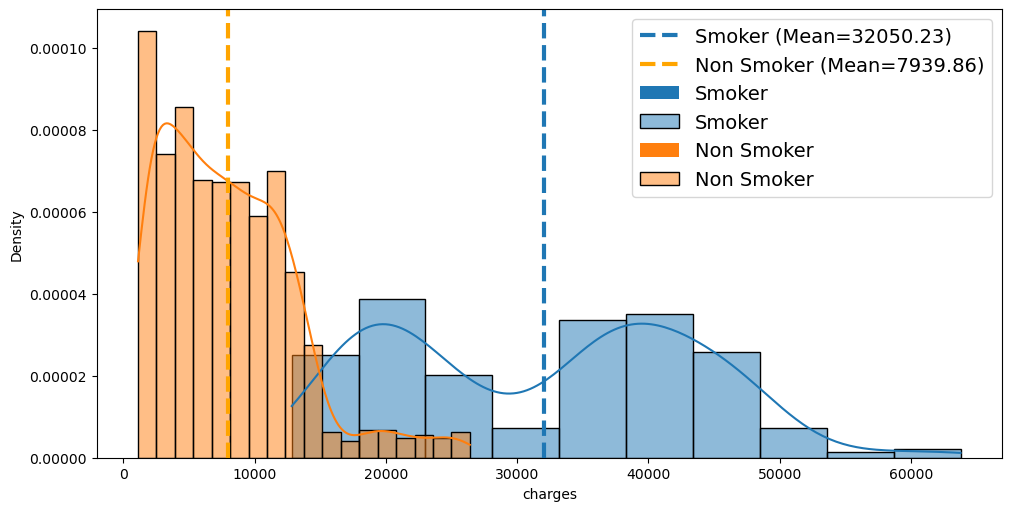

In [18]:
## Visualizing mean quantities sold
fig, ax = plt.subplots(figsize= (10,5), constrained_layout=True);

# Histogram
ax = sns.histplot(data=y_df, x='charges',fill=True,kde=True,
                  stat='density',common_norm=False,ax=ax, label="Smoker");
ax = sns.histplot(data=n_df, x='charges',fill=True,kde=True,
                  stat='density',common_norm=False,ax=ax, label="Non Smoker");

ax.axvline(np.mean(y_df['charges']), ls='--',lw=3, 
           label=f"Smoker (Mean={np.mean(y_df['charges']):.2f})");
ax.axvline(np.mean( n_df['charges']), ls='--',lw=3, 
           label=f"Non Smoker (Mean={np.mean(n_df['charges']):.2f})", color ='orange');

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1]);



In [19]:
## loop to take 1000 samples of and calculate the mean of each sample
np.random.seed(42)
sample_means_y = [] # smoker
sample_means_n = [] # non smoker
for i in range(1000):   
    sample = np.random.choice(y_df['charges'], size=30, replace=False)
    sample2 = np.random.choice(n_df['charges'], size=30, replace=False)
    sample_means_y.append(np.mean(sample))
    sample_means_n.append(np.mean(sample2))

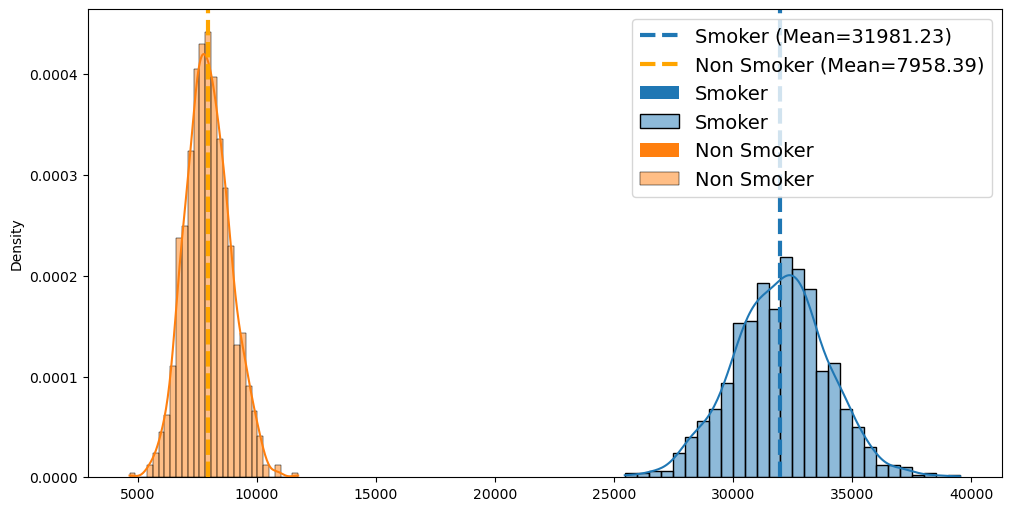

In [21]:
## Visualizing  sample means
fig, ax = plt.subplots(figsize= (10,5), constrained_layout=True);


# Histogram
ax = sns.histplot(data=sample_means_y,fill=True,kde=True,
                  stat='density',common_norm=False,ax=ax, label="Smoker");
ax = sns.histplot(data=sample_means_n, fill=True,kde=True,
                  stat='density',common_norm=False,ax=ax, label="Non Smoker");

ax.axvline(np.mean(sample_means_y), ls='--',lw=3, 
           label=f"Smoker (Mean={np.mean(sample_means_y):.2f})");

ax.axvline(np.mean(sample_means_n), ls='--',lw=3, color='orange',
           label=f"Non Smoker (Mean={np.mean(sample_means_n):.2f})");

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1]);



Using Central Limit Theorem for our data we can conclude that the mean charges are different for smokers and non-smokers and that the mean for smokers is greater than non-smokers.  This is our null hypothesis

### 3.  Test the assumptions of your selected test.
-  No significant outliers
-  Normality
-  Equal Variance
 

#### Check for significant outliers.  Remove if present

In [8]:
#Look at charges greater than 3 standard deviations from the mean for smokers
y_outliers = np.abs(stats.zscore(y_df["charges"])) > 3
y_outliers.sum()

0

In [9]:
#Look at charges greater than 3 standard deviations from the mean for non-smokers
n_outliers = np.abs(stats.zscore(n_df["charges"])) > 3
n_outliers.sum()

24

In [10]:
#remove outliers
n_df=n_df.loc[~n_outliers]

#### Test for Normality



In [11]:
result = stats.normaltest(y_df['charges'])
result.pvalue

5.564930630036463e-14

In [12]:
len(y_df["charges"])

274

In [13]:
result = stats.normaltest(n_df['charges'])
result.pvalue

2.6945416315543976e-36

In [14]:
len(n_df["charges"])

1040

> Our p-values for both groups are well below 0.05 which means we REJECT the null hypothesis. We can conclude that our data is NOT normally distributed. However, our sample size is large enough to proceed without satisfying this assumption. For an independent t_test, sample sizes of 15 per group are considered sufficient.


#### Test for equal variance

In [15]:
## Use Levene's test for equal variance
result = stats.levene(y_df["charges"], n_df['charges'])
print(result)
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
The groups do NOT have equal variance.


- We met the assumption of normality but did NOT meet the assumption of equal variance. 
- We will therefore run a Welch's t-test instead by adding `equal_var=False` to `stats.ttest_ind`

### 4.  Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [16]:
result = stats.ttest_ind(y_df["charges"], n_df['charges'], equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

### 5. Interpret your p-value and reject or fail to reject your null hypothesis

We had a p-value < .05 for our Welch's t-test. We reject the null hypothesis and support the alternative that: \
*There is a significant difference in insurance charges between smokers and non smokers.*

### 6. Show a supporting visualization that helps display the result
See Sample Means display 

## Q2  Are men more likely to smoke than women?

### 1.  State your Null Hypothesis and Alternative Hypothesis
- $H_0$ (Null Hypothesis): There number of men and women smokers is equally distributed. 
- $H_A$ (Alternative Hypothesis):  There is a significant difference in the number of men and women smokers. 


### 2. Select the correct test according to the data type and number of samples

- Type of Data? 
 - categorical - `smoker` 
- How many groups/samples? 2
    - 2 male/female
- Therefore, which test is appropriate? 
    - Chi squared test



### Visualize and Separate Data for hypothesis

In [39]:
m = df[(df["smoker"]=='yes') &(df["sex"]=="male")]
f = df[(df["smoker"]=='yes') &(df["sex"]=="female")]

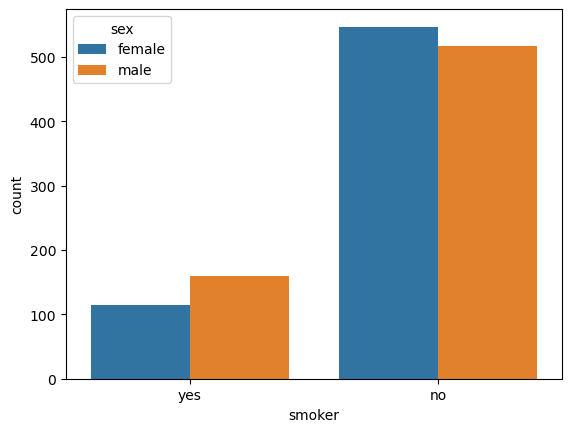

In [44]:
## Visualizing quantities of smokers by sex
ax = sns.countplot(data = df, x='smoker', hue='sex')

In [45]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [46]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Our P-value is less than 0.05. We thus Reject the null hypothesis and conclude that there is a relationship between sex and the number of smokers

### 3.  Test the assumptions of your selected test.
- There are two categorical variables (ordinal or nominal)
- The outcomes are independent

#### Check for significant outliers.  Remove if present
N/A

#### Test for Normality

N/A

#### Test for equal variance
N/A

### 4.  Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [16]:
result = stats.ttest_ind(y_df["charges"], n_df['charges'], equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

### 5. Interpret your p-value and reject or fail to reject your null hypothesis

In [45]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [46]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Our P-value is less than 0.05. We thus Reject the null hypothesis and conclude that there is a relationship between sex and the number of smokers

### 6. Show a supporting visualization that helps display the result


## Q3. Do different regions have different charges, on average?

### 1.  State your Null Hypothesis and Alternative Hypothesis
- $H_0$ (Null Hypothesis): Different regions do not have statistically different charges on average. 

- $H_A$ (Alternative Hypothesis):  Different regions have a statistical difference in average charges. 


### 2. Select the correct test according to the data type and number of samples

- Type of Data? 
 - numerical - `charges.mean()` 
- How many groups/samples? multiple
    - `regions`
- Therefore, which test is appropriate? 
    - ANOVA test



### Visualize and Separate Data for hypothesis

### 3.  Test the assumptions of your selected test.
- Normality
- Equal variance
- No significant outliers

#### No significant outliers

In [48]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [51]:
sw = df[df['region']=='southwest']
se = df[df['region']=='southeast']
nw = df[df['region']=='northwest']
ne = df[df['region']=='northeast']

<AxesSubplot: xlabel='region', ylabel='charges'>

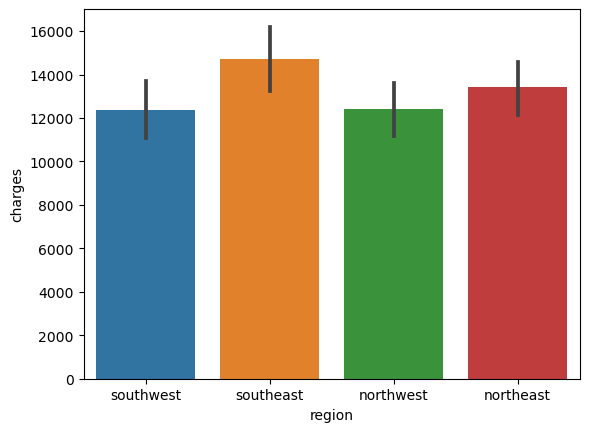

In [53]:
sns.barplot(data= df, x='region', y='charges')

In [56]:
## Create groups dictionary. There are only 4 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

#### Normality Test

In [57]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [58]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


Each region has a p-value less than $\alpha$.  We must REJECT the null hypothesis for normal distribution, therefore our charges are not normally distributed.  However, our group sizes are significantly large such that we can ignore this assumption based on the Central Limit Theorem.  

#### Test for Equal Variance

In [59]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

Our p<$\alpha$, thus we must REJECT the null hypothesis.  We cannot assume equal variance amongst regions.

### 4.  Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [61]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

### 5. Interpret your p-value and reject or fail to reject your null hypothesis

p<$\alpha$, thus we must reject the null hypothesis.  This implies that there is significant difference in mean charges in regions.

An ANOVA returns a single p-value to represent the differences between ALL groups. Now that we KNOW we have significant differences, we are allowed to perform pairwise comparisons between every group.

We will not use an ordinary t-test for this, instead, we will use a test that is specifically designed to adjust each pair's p-values so that we are less likely to make a Type I error.


In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as charges and the labels to the regions
values = df['charges']
labels = df['region']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


We can see we have a significant result in comparing the southeast and southwest regions.  All other group comparisons show that we my reject the null hypothesis.